In [350]:
# importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [351]:
# load the data

df = pd.read_csv("car_price_prediction.csv")

df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


# UNDERSTANDING OF DATASET

In [352]:
# printing the first 5 dataset

df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [353]:
# number of rows and column

df.shape

(19237, 18)

In [354]:
# to get a concise information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [355]:
# summary statistics of dataset

df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [356]:
# to check for duplicated value in the dataset

df.duplicated().sum()

313

In [357]:
# droppng duplicates 

df.drop_duplicates()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [358]:
# to check for NaN value in the dataset

df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

# DATA CLEANING

In [359]:
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


## ITERATE THROUGH EACH OF THE COLUMNS 

 Filter the 'price' column for prices such as 30, 50, 125, etc., which are significantly lower than typical values

 Using only values less than $500 for our analysis to reduce bias in the model

 The rows with prices above $500 constitute about 8% of our dataset

 Since this is a relatively small portion, we can afford to drop these rows without losing significant data


In [360]:
# Filtering the dataset to include only rows with 'price' less than $500

price_to_drop = df[df["Price"] <= 500]

price_to_drop

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
27,45804684,30,-,TOYOTA,Prius,2008,Sedan,No,Hybrid,1.5,169000 km,4.0,Automatic,Front,04-May,Left wheel,White,8
33,45770026,125,1750,TOYOTA,Highlander,2008,Sedan,Yes,Hybrid,3.3,287274 km,6.0,Automatic,4x4,04-May,Left wheel,White,12
39,45661296,314,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,382746 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
45,45769564,220,1194,TOYOTA,Tacoma,2013,Jeep,Yes,Petrol,4,239342 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
53,45769316,392,1017,MERCEDES-BENZ,E 300,2017,Sedan,Yes,Petrol,2,1600 km,4.0,Automatic,Rear,04-May,Left wheel,Black,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19215,45763841,470,831,HYUNDAI,Elantra,2017,Sedan,Yes,Petrol,1.6,25635 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
19218,45748699,30,-,NISSAN,Note,2006,Hatchback,No,Petrol,1.3,0 km,4.0,Automatic,Front,04-May,Right-hand drive,Green,9
19229,39977395,50,-,TOYOTA,Prius,2008,Hatchback,No,Hybrid,1.5,150000 km,4.0,Automatic,Front,04-May,Left wheel,Silver,6
19230,45760891,470,645,TOYOTA,Prius,2011,Hatchback,Yes,Hybrid,1.8,307325 km,4.0,Automatic,Front,04-May,Left wheel,Silver,12


In [361]:
df2 = df[~df.index.isin (price_to_drop.index)]

df2

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,45772306,5802,1055,MERCEDES-BENZ,E 350,2013,Sedan,Yes,Diesel,3.5,107800 km,6.0,Automatic,Rear,04-May,Left wheel,Grey,12
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4


 In the Levy column, some of the values are in "-"

 Filling the "-" rows with the average mean


In [362]:
# filtering for rows with "-"

df2[df2["Levy"] == "-"]



,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
9,45756839,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
11,45814819,8781,-,FORD,Transit,1999,Microbus,No,CNG,4,0 km,8.0,Manual,Rear,02-Mar,Left wheel,Blue,0
12,45815568,3000,-,OPEL,Vectra,1997,Goods wagon,No,CNG,1.6,350000 km,4.0,Manual,Front,04-May,Left wheel,White,4
23,45814106,7840,-,FORD,Transit,2001,Microbus,No,Diesel,2.0 Turbo,230000 km,4.0,Manual,Front,02-Mar,Left wheel,White,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19221,45776906,15681,-,VOLKSWAGEN,Jetta,2013,Sedan,Yes,Petrol,2.5,81200 km,5.0,Manual,Front,04-May,Left wheel,Silver,12
19223,44571028,8781,-,DODGE,Caliber,2008,Hatchback,No,Petrol,2.4,0 km,4.0,Automatic,Front,04-May,Left wheel,Blue,4
19224,45768089,19130,-,KIA,Optima ex,2014,Sedan,Yes,Petrol,2.4,35800 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
19226,45796788,7840,-,NISSAN,Skyline,2003,Sedan,Yes,Petrol,3,220000 km,6.0,Tiptronic,Rear,04-May,Right-hand drive,White,0


 The 'price' column is string dtype, preventing from performing numerical operations

To handle this, fill "-" with "0" (as a placeholder) before converting the column to a numeric type


In [363]:

new_value = {"-" : 0}

df2["Levy"] = df2["Levy"].replace(new_value)

In [364]:
df2

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,45772306,5802,1055,MERCEDES-BENZ,E 350,2013,Sedan,Yes,Diesel,3.5,107800 km,6.0,Automatic,Rear,04-May,Left wheel,Grey,12
19232,45798355,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4


In [365]:
# convert to an integer dtype

df2["Levy"] = df2["Levy"].astype (int)

In [366]:
# now we would convert our "0"  to NaN values to get the mean

value_to_convert = [0]

df2["Levy"].replace (value_to_convert, np.nan, inplace = True)

In [367]:
df2

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,45772306,5802,1055.0,MERCEDES-BENZ,E 350,2013,Sedan,Yes,Diesel,3.5,107800 km,6.0,Automatic,Rear,04-May,Left wheel,Grey,12
19232,45798355,8467,NaN,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4


In [368]:
import statistics 

mean = round(df2["Levy"].mean())

mean

898

In [369]:
# we fill the missing value with the mean

df2["Levy"].fillna(mean, inplace = True)


In [370]:
df2

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,898.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,45772306,5802,1055.0,MERCEDES-BENZ,E 350,2013,Sedan,Yes,Diesel,3.5,107800 km,6.0,Automatic,Rear,04-May,Left wheel,Grey,12
19232,45798355,8467,898.0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4


The 'engine_volume' column contains two kinds of values: 

     - 'litres' and 'turbo'

 To facilitate analysis, split into two separate columns

In [371]:
df2["Engine volume"]

0              3.5
1                3
2              1.3
3              2.5
4              1.3
           ...    
19231          3.5
19232    2.0 Turbo
19233          2.4
19234            2
19235            2
Name: Engine volume, Length: 17572, dtype: object

In [372]:
# filtering rows containing "Turbo"

turbo = df2[df2["Engine volume"].str.contains ("Turbo")]

turbo


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
23,45814106,7840,898.0,FORD,Transit,2001,Microbus,No,Diesel,2.0 Turbo,230000 km,4.0,Manual,Front,02-Mar,Left wheel,White,0
25,45782859,20385,898.0,MERCEDES-BENZ,E 220,2006,Sedan,Yes,Diesel,2.2 Turbo,210000 km,4.0,Tiptronic,Rear,04-May,Left wheel,Black,8
30,44944581,15681,1288.0,MERCEDES-BENZ,Vito,2007,Goods wagon,No,Diesel,2.0 Turbo,180000 km,6.0,Manual,Rear,04-May,Left wheel,White,4
34,45542380,24462,898.0,JEEP,Grand Cherokee,2007,Jeep,Yes,Diesel,3.0 Turbo,250000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,10
42,45667253,20165,650.0,VOLKSWAGEN,Jetta,2016,Sedan,Yes,Petrol,1.4 Turbo,11200 km,4.0,Tiptronic,Front,04-May,Left wheel,Black,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19170,45776725,10976,898.0,MERCEDES-BENZ,C 220,2001,Sedan,No,Diesel,2.2 Turbo,320000 km,5.0,Automatic,Rear,04-May,Left wheel,Silver,4
19190,45790255,24462,642.0,BMW,528,2012,Sedan,Yes,Petrol,2.0 Turbo,96966 km,4.0,Tiptronic,Rear,04-May,Left wheel,Black,12
19200,45725908,36065,640.0,MERCEDES-BENZ,CLA 250 AMG,2013,Sedan,Yes,Petrol,2.0 Turbo,68000 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,12
19225,45794580,8781,1107.0,OPEL,Combo,2007,Goods wagon,No,Diesel,1.7 Turbo,236000 km,4.0,Manual,Front,04-May,Left wheel,Beige,4


In [373]:
# new column for the turbo_rows

df2["Engine_volume_turbo"] = turbo["Engine volume"]

In [374]:
df2

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Engine_volume_turbo
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,NaN
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,NaN
2,45774419,8467,898.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,NaN
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,NaN
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,45772306,5802,1055.0,MERCEDES-BENZ,E 350,2013,Sedan,Yes,Diesel,3.5,107800 km,6.0,Automatic,Rear,04-May,Left wheel,Grey,12,NaN
19232,45798355,8467,898.0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5,2.0 Turbo
19233,45778856,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,NaN
19234,45804997,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4,NaN


 After creating a new column 'engine_volume_turbo' 

 we will remove the 'turbo' entries from the original 'engine_volume' column.

 This will leave only the 'litres' values in the 'engine_volume' column and fill NaN with "0"


In [375]:

df2.loc[df2["Engine volume"].str.contains ("Turbo"), "Engine volume"] = 0

In [376]:
df2

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Engine_volume_turbo
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,NaN
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,NaN
2,45774419,8467,898.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,NaN
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,NaN
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,45772306,5802,1055.0,MERCEDES-BENZ,E 350,2013,Sedan,Yes,Diesel,3.5,107800 km,6.0,Automatic,Rear,04-May,Left wheel,Grey,12,NaN
19232,45798355,8467,898.0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,0,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5,2.0 Turbo
19233,45778856,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,NaN
19234,45804997,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4,NaN


 For the "mileage" column, remove the 'km' suffix to convert the values to integers.

 This will allow us to perform numerical operations on the mileage data.

 Same will be done for "Engine_volume_turbo", remove the "Turbo" suffix

In [377]:
df2["Mileage"]

0        186005 km
1        192000 km
2        200000 km
3        168966 km
4         91901 km
           ...    
19231    107800 km
19232    300000 km
19233    161600 km
19234    116365 km
19235     51258 km
Name: Mileage, Length: 17572, dtype: object

In [378]:
df2["Engine_volume_turbo"]

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
19231          NaN
19232    2.0 Turbo
19233          NaN
19234          NaN
19235          NaN
Name: Engine_volume_turbo, Length: 17572, dtype: object

In [379]:
# split into two column

df2[["Engine_volume_turbo", "split"]] = df2["Engine_volume_turbo"].str.split (" ", expand = True)


In [380]:
# split into two column

df2[["Mileage", "split1"]] = df2["Mileage"].str.split (" ", expand = True)



In [381]:
df2

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,...,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Engine_volume_turbo,split,split1
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,...,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,NaN,NaN,km
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,...,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,NaN,NaN,km
2,45774419,8467,898.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,...,4.0,Variator,Front,04-May,Right-hand drive,Black,2,NaN,NaN,km
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,...,4.0,Automatic,4x4,04-May,Left wheel,White,0,NaN,NaN,km
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,...,4.0,Automatic,Front,04-May,Left wheel,Silver,4,NaN,NaN,km
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,45772306,5802,1055.0,MERCEDES-BENZ,E 350,2013,Sedan,Yes,Diesel,3.5,...,6.0,Automatic,Rear,04-May,Left wheel,Grey,12,NaN,NaN,km
19232,45798355,8467,898.0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,0,...,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5,2.0,Turbo,km
19233,45778856,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,...,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,NaN,NaN,km
19234,45804997,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,...,4.0,Automatic,Front,04-May,Left wheel,Grey,4,NaN,NaN,km


In [382]:
# dropping the unnecessary columns 

df3 = df2.drop(columns = ["split", "split1"])

df3

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Engine_volume_turbo
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,NaN
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,NaN
2,45774419,8467,898.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2,NaN
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0,NaN
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,45772306,5802,1055.0,MERCEDES-BENZ,E 350,2013,Sedan,Yes,Diesel,3.5,107800,6.0,Automatic,Rear,04-May,Left wheel,Grey,12,NaN
19232,45798355,8467,898.0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,0,300000,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5,2.0
19233,45778856,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,NaN
19234,45804997,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365,4.0,Automatic,Front,04-May,Left wheel,Grey,4,NaN


In [383]:
df3["Engine_volume_turbo"].fillna(0, inplace = True)

In [384]:
df3

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Engine_volume_turbo
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,0
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,0
2,45774419,8467,898.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2,0
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,45772306,5802,1055.0,MERCEDES-BENZ,E 350,2013,Sedan,Yes,Diesel,3.5,107800,6.0,Automatic,Rear,04-May,Left wheel,Grey,12,0
19232,45798355,8467,898.0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,0,300000,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5,2.0
19233,45778856,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,0
19234,45804997,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365,4.0,Automatic,Front,04-May,Left wheel,Grey,4,0


The "doors" column represent the number of doors in cars 

    04-May : 4 or 5 doors 
    02-Mar : 2 or 3 doors
    >5 : more than 5 doors
    
   

In [385]:
df3["Doors"].value_counts()

Doors
04-May    16695
02-Mar      758
>5          119
Name: count, dtype: int64

In [386]:
# we will standardize them for better understanding 

new_value = {"04-May": "4 - 5",
            "02-Mar" : "2 - 3",
            ">5" : "5+"
            }

df3["Doors"] = df3["Doors"].replace (new_value)

In [387]:
df3["Doors"].value_counts()

Doors
4 - 5    16695
2 - 3      758
5+         119
Name: count, dtype: int64

In [388]:
df3

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Engine_volume_turbo
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4 - 5,Left wheel,Silver,12,0
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,4 - 5,Left wheel,Black,8,0
2,45774419,8467,898.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4 - 5,Right-hand drive,Black,2,0
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4 - 5,Left wheel,White,0,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4 - 5,Left wheel,Silver,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,45772306,5802,1055.0,MERCEDES-BENZ,E 350,2013,Sedan,Yes,Diesel,3.5,107800,6.0,Automatic,Rear,4 - 5,Left wheel,Grey,12,0
19232,45798355,8467,898.0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,0,300000,4.0,Manual,Rear,2 - 3,Left wheel,Silver,5,2.0
19233,45778856,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,4 - 5,Left wheel,Red,8,0
19234,45804997,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365,4.0,Automatic,Front,4 - 5,Left wheel,Grey,4,0


In [389]:
# convert it to an float for numerical operations 

df3["Engine volume"] = df3["Engine volume"].astype (float)
df3["Engine_volume_turbo"] = df3["Engine_volume_turbo"].astype (float)                           
df3["Mileage"] = df3["Mileage"].astype (float)                           

In [390]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17572 entries, 0 to 19235
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   17572 non-null  int64  
 1   Price                17572 non-null  int64  
 2   Levy                 17572 non-null  float64
 3   Manufacturer         17572 non-null  object 
 4   Model                17572 non-null  object 
 5   Prod. year           17572 non-null  int64  
 6   Category             17572 non-null  object 
 7   Leather interior     17572 non-null  object 
 8   Fuel type            17572 non-null  object 
 9   Engine volume        17572 non-null  float64
 10  Mileage              17572 non-null  float64
 11  Cylinders            17572 non-null  float64
 12  Gear box type        17572 non-null  object 
 13  Drive wheels         17572 non-null  object 
 14  Doors                17572 non-null  object 
 15  Wheel                17572 non-null  obje

# DEALING WITH OUTLIERS

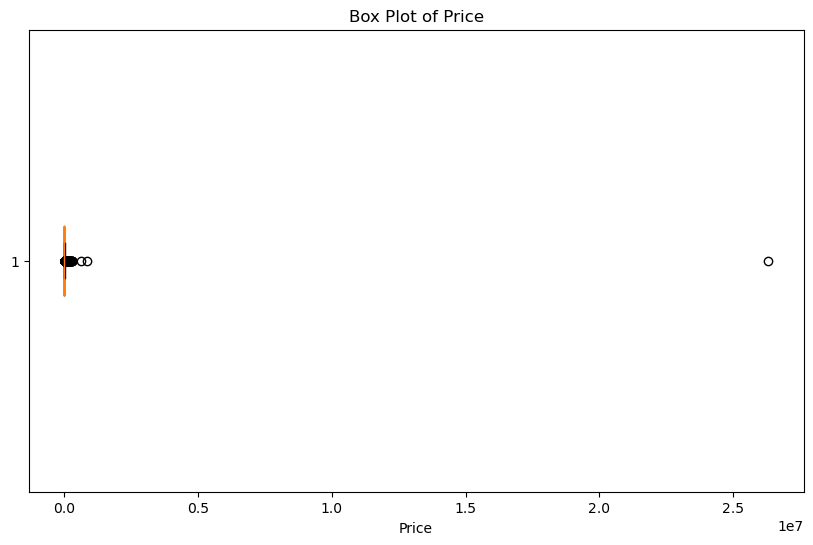

In [391]:
# plotting "target" column, to know of outliers 

plt.figure(figsize=(10, 6))
plt.boxplot(df3["Price"], vert=False)
plt.title("Box Plot of Price")
plt.xlabel("Price")
plt.show()

using IQR to handle outliers because the data contains extreme values

In [392]:
# Calculate IQR
Q1 = df3["Price"].quantile(0.25)
Q3 = df3["Price"].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df3[(df3["Price"] < lower_bound) | (df3["Price"] > upper_bound)]
print(f"Number of outliers: {outliers.shape[0]}")

Number of outliers: 1061


In [393]:
# viewing the outliers

outliers

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Engine_volume_turbo
14,45732604,59464,891.0,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2.0,76000.0,4.0,Automatic,Front,4 - 5,Left wheel,White,4,0.0
36,45369569,51746,1077.0,TOYOTA,CHR Limited,2019,Jeep,No,Petrol,2.0,10200.0,4.0,Tiptronic,Front,4 - 5,Left wheel,Red,12,0.0
47,45732544,55390,1017.0,HYUNDAI,Santa FE,2017,Jeep,Yes,Diesel,2.0,100734.0,4.0,Automatic,Front,4 - 5,Left wheel,Black,4,0.0
56,44316016,87112,898.0,MERCEDES-BENZ,GLA 250,2019,Jeep,Yes,Petrol,0.0,5323.0,4.0,Tiptronic,4x4,4 - 5,Left wheel,Grey,0,2.0
73,45732043,53154,891.0,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2.0,84506.0,4.0,Automatic,Front,4 - 5,Left wheel,Silver,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19144,45733642,56814,1017.0,HYUNDAI,Sonata,2017,Sedan,Yes,Petrol,2.0,67365.0,4.0,Automatic,Front,4 - 5,Left wheel,Black,4,0.0
19161,45677230,64290,898.0,LEXUS,RX 450 F SPORT,2012,Jeep,Yes,Hybrid,3.5,97000.0,6.0,Variator,4x4,4 - 5,Left wheel,Black,12,0.0
19180,45803164,63886,1076.0,HYUNDAI,Sonata,2020,Sedan,Yes,LPG,2.0,5305.0,4.0,Automatic,Front,4 - 5,Left wheel,Silver,4,0.0
19188,45571892,61154,579.0,TOYOTA,RAV 4,2017,Jeep,No,Hybrid,2.5,71234.0,4.0,Tiptronic,4x4,4 - 5,Left wheel,White,12,0.0


In [394]:
# Remove outliers in the "Price" column

df4 = df3[(df3["Price"] >= lower_bound) & (df3["Price"] <= upper_bound)]



In [395]:
df4.shape

(16511, 19)

In [396]:
# checking for the mileage 

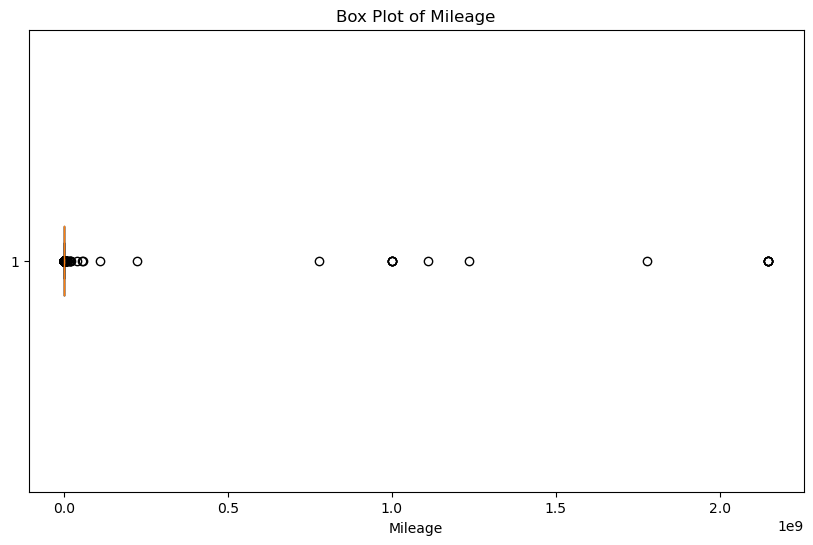

In [397]:
# plotting "target" column, to know of outliers 

plt.figure(figsize=(10, 6))
plt.boxplot(df3["Mileage"], vert=False)
plt.title("Box Plot of Mileage")
plt.xlabel("Mileage")
plt.show()

In [398]:
# Calculate IQR
Q1 = df4["Mileage"].quantile(0.25)
Q3 = df4["Mileage"].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
mile_outliers = df4[(df4["Mileage"] < lower_bound) | (df4["Mileage"] > upper_bound)]
print(f"Number of outliers: {mile_outliers.shape[0]}")

Number of outliers: 619


In [399]:
mile_outliers["Mileage"]

8        3.980690e+05
19       3.645230e+05
29       4.205500e+05
65       7.198470e+05
144      1.111111e+06
             ...     
19151    4.300000e+05
19163    4.895840e+05
19167    2.147484e+09
19199    1.111111e+09
19222    7.359700e+05
Name: Mileage, Length: 619, dtype: float64

In [400]:
# Remove outliers in the bed column
df5 = df4[(df4["Mileage"] >= lower_bound) & (df4["Mileage"] <= upper_bound)]


In [401]:
df5.shape

(15892, 19)

In [402]:
df5

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Engine_volume_turbo
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,4 - 5,Left wheel,Silver,12,0.0
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,4 - 5,Left wheel,Black,8,0.0
2,45774419,8467,898.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,4 - 5,Right-hand drive,Black,2,0.0
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,4 - 5,Left wheel,White,0,0.0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,4 - 5,Left wheel,Silver,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,45772306,5802,1055.0,MERCEDES-BENZ,E 350,2013,Sedan,Yes,Diesel,3.5,107800.0,6.0,Automatic,Rear,4 - 5,Left wheel,Grey,12,0.0
19232,45798355,8467,898.0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,0.0,300000.0,4.0,Manual,Rear,2 - 3,Left wheel,Silver,5,2.0
19233,45778856,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600.0,4.0,Tiptronic,Front,4 - 5,Left wheel,Red,8,0.0
19234,45804997,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365.0,4.0,Automatic,Front,4 - 5,Left wheel,Grey,4,0.0


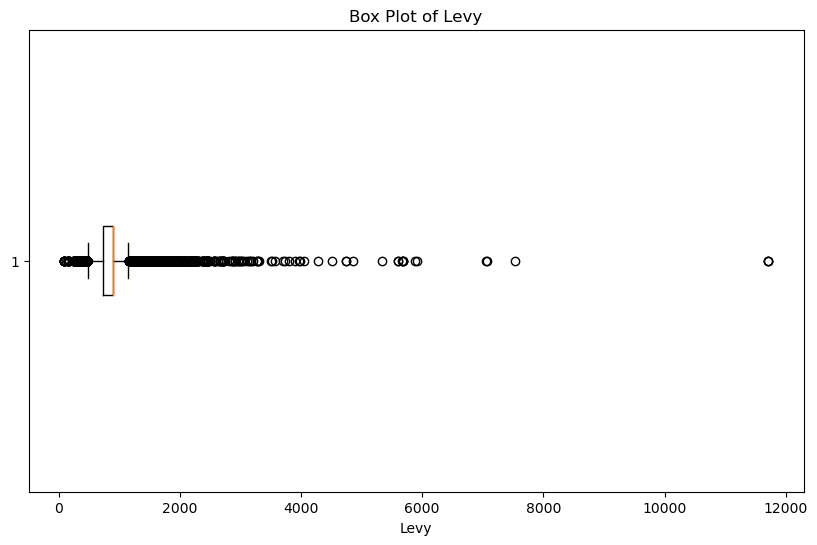

In [403]:
# plotting "target" column, to know of outliers 

plt.figure(figsize=(10, 6))
plt.boxplot(df3["Levy"], vert=False)
plt.title("Box Plot of Levy")
plt.xlabel("Levy")
plt.show()

In [404]:
# Calculate IQR
Q1 = df5["Levy"].quantile(0.25)
Q3 = df5["Levy"].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
levy_outliers = df5[(df5["Levy"] < lower_bound) | (df5["Levy"] > upper_bound)]
print(f"Number of outliers: {levy_outliers.shape[0]}")

Number of outliers: 2390


In [405]:
levy_outliers

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Engine_volume_turbo
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,4 - 5,Left wheel,Silver,12,0.0
18,45772104,549,2386.0,HYUNDAI,Sonata,2006,Sedan,Yes,Petrol,3.3,295059.0,6.0,Automatic,Rear,4 - 5,Left wheel,Blue,12,0.0
22,45751951,17562,1249.0,TOYOTA,Camry,2017,Sedan,Yes,Petrol,2.5,39709.0,4.0,Automatic,Front,4 - 5,Left wheel,Black,12,0.0
26,45759112,549,2455.0,LEXUS,GX 470,2008,Jeep,Yes,Petrol,4.7,0.0,8.0,Automatic,4x4,4 - 5,Left wheel,White,0,0.0
30,44944581,15681,1288.0,MERCEDES-BENZ,Vito,2007,Goods wagon,No,Diesel,0.0,180000.0,6.0,Manual,Rear,4 - 5,Left wheel,White,4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19183,45783805,11917,1268.0,TOYOTA,Prius C aqua,2012,Hatchback,No,Hybrid,1.5,157000.0,3.0,Automatic,Front,4 - 5,Right-hand drive,Silver,8,0.0
19216,45784464,37633,1249.0,TOYOTA,RAV 4,2017,Jeep,Yes,Petrol,2.5,23430.0,4.0,Tiptronic,Front,4 - 5,Left wheel,Beige,12,0.0
19217,45804344,26017,1624.0,LEXUS,ES 300,2009,Sedan,Yes,Petrol,3.5,132700.0,4.0,Automatic,Front,4 - 5,Left wheel,White,4,0.0
19228,45773726,706,1850.0,MERCEDES-BENZ,E 350,2008,Sedan,Yes,Diesel,3.5,122874.0,6.0,Automatic,Rear,4 - 5,Left wheel,Black,12,0.0


In [406]:
# Remove outliers in the Levy column

df6 = df5[(df5["Levy"] >= lower_bound) & (df5["Levy"] <= upper_bound)]


In [407]:
clean_df = df6.drop(["ID"], axis = 1)

In [408]:
clean_df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Engine_volume_turbo
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,4 - 5,Left wheel,Black,8,0.0
2,8467,898.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,4 - 5,Right-hand drive,Black,2,0.0
3,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,4 - 5,Left wheel,White,0,0.0
4,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,4 - 5,Left wheel,Silver,4,0.0
5,39493,891.0,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2.0,160931.0,4.0,Automatic,Front,4 - 5,Left wheel,White,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19227,29793,1053.0,MERCEDES-BENZ,E 350,2014,Sedan,Yes,Diesel,3.5,219030.0,6.0,Automatic,4x4,4 - 5,Left wheel,Black,12,0.0
19231,5802,1055.0,MERCEDES-BENZ,E 350,2013,Sedan,Yes,Diesel,3.5,107800.0,6.0,Automatic,Rear,4 - 5,Left wheel,Grey,12,0.0
19232,8467,898.0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,0.0,300000.0,4.0,Manual,Rear,2 - 3,Left wheel,Silver,5,2.0
19233,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600.0,4.0,Tiptronic,Front,4 - 5,Left wheel,Red,8,0.0


# BUILDING THE MACHINE MODEL

In [409]:
# WE WILL DECODE THE CATEGORICAL VARIABLE 

In [410]:

from category_encoders import LeaveOneOutEncoder
from sklearn.model_selection import train_test_split


In [411]:
# the columns to encode 
columns_to_encode = ["Manufacturer", "Model"]

# using leave-one-out encoder
encoder = encoder = LeaveOneOutEncoder(cols=columns_to_encode)
clean_df_encoded = encoder.fit_transform(clean_df[columns_to_encode], clean_df['Price'])

# join to the original dataframe
clean_df1 = pd.concat ([clean_df, clean_df_encoded.add_suffix ("_LOO")], axis = 1)

In [412]:
clean_df1.drop(["Manufacturer", "Model"], axis = 1, inplace = True)

In [413]:
# USING ONE HOT ENCODER

column_to_dummy = clean_df1.select_dtypes (include = ["object", "category"]).columns




In [414]:
# to get the dummy variables 

new_clean = pd.get_dummies (clean_df1, columns = column_to_dummy, drop_first = True)

new_clean

,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Engine_volume_turbo,Manufacturer_LOO,Model_LOO,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
1,16621,1018.0,2011,3.0,192000.0,6.0,8,0.0,15702.715152,9125.950000,...,False,False,False,False,False,False,False,False,False,False
2,8467,898.0,2006,1.3,200000.0,4.0,2,0.0,13027.292899,13536.666667,...,False,False,False,False,False,False,False,False,False,False
3,3607,862.0,2011,2.5,168966.0,4.0,0,0.0,14540.107330,12487.637500,...,False,False,False,False,False,False,False,False,True,False
4,11726,446.0,2014,1.3,91901.0,4.0,4,0.0,13022.471893,13525.350694,...,False,False,False,False,False,False,True,False,False,False
5,39493,891.0,2016,2.0,160931.0,4.0,4,0.0,20708.050155,31519.181287,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19227,29793,1053.0,2014,3.5,219030.0,6.0,12,0.0,15771.223473,13991.723247,...,False,False,False,False,False,False,False,False,False,False
19231,5802,1055.0,2013,3.5,107800.0,6.0,12,0.0,15790.508842,14080.250923,...,False,True,False,False,False,False,False,False,False,False
19232,8467,898.0,1999,0.0,300000.0,4.0,5,2.0,15788.366559,7436.000000,...,False,False,False,False,False,False,True,False,False,False
19233,15681,831.0,2011,2.4,161600.0,4.0,8,0.0,20716.230161,13921.827427,...,False,False,False,False,False,True,False,False,False,False


In [415]:
# to convert to integer dtype

# loop through each of the columns 
for column in new_clean.columns:
    
    # pass a condition to check if it has boolean dtype ("true" / "false")
    if new_clean[column].dtype == bool:
        
        # if yes : then convert to an integer 
        new_clean[column] = new_clean[column].astype (int)
        

In [416]:
new_clean



,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Engine_volume_turbo,Manufacturer_LOO,Model_LOO,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
1,16621,1018.0,2011,3.0,192000.0,6.0,8,0.0,15702.715152,9125.950000,...,0,0,0,0,0,0,0,0,0,0
2,8467,898.0,2006,1.3,200000.0,4.0,2,0.0,13027.292899,13536.666667,...,0,0,0,0,0,0,0,0,0,0
3,3607,862.0,2011,2.5,168966.0,4.0,0,0.0,14540.107330,12487.637500,...,0,0,0,0,0,0,0,0,1,0
4,11726,446.0,2014,1.3,91901.0,4.0,4,0.0,13022.471893,13525.350694,...,0,0,0,0,0,0,1,0,0,0
5,39493,891.0,2016,2.0,160931.0,4.0,4,0.0,20708.050155,31519.181287,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19227,29793,1053.0,2014,3.5,219030.0,6.0,12,0.0,15771.223473,13991.723247,...,0,0,0,0,0,0,0,0,0,0
19231,5802,1055.0,2013,3.5,107800.0,6.0,12,0.0,15790.508842,14080.250923,...,0,1,0,0,0,0,0,0,0,0
19232,8467,898.0,1999,0.0,300000.0,4.0,5,2.0,15788.366559,7436.000000,...,0,0,0,0,0,0,1,0,0,0
19233,15681,831.0,2011,2.4,161600.0,4.0,8,0.0,20716.230161,13921.827427,...,0,0,0,0,0,1,0,0,0,0


In [417]:
# X is the entire df, minues the "target" column

X = new_clean.drop (["Price"], axis = 1)

X


,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Engine_volume_turbo,Manufacturer_LOO,Model_LOO,Category_Coupe,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
1,1018.0,2011,3.0,192000.0,6.0,8,0.0,15702.715152,9125.950000,0,...,0,0,0,0,0,0,0,0,0,0
2,898.0,2006,1.3,200000.0,4.0,2,0.0,13027.292899,13536.666667,0,...,0,0,0,0,0,0,0,0,0,0
3,862.0,2011,2.5,168966.0,4.0,0,0.0,14540.107330,12487.637500,0,...,0,0,0,0,0,0,0,0,1,0
4,446.0,2014,1.3,91901.0,4.0,4,0.0,13022.471893,13525.350694,0,...,0,0,0,0,0,0,1,0,0,0
5,891.0,2016,2.0,160931.0,4.0,4,0.0,20708.050155,31519.181287,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19227,1053.0,2014,3.5,219030.0,6.0,12,0.0,15771.223473,13991.723247,0,...,0,0,0,0,0,0,0,0,0,0
19231,1055.0,2013,3.5,107800.0,6.0,12,0.0,15790.508842,14080.250923,0,...,0,1,0,0,0,0,0,0,0,0
19232,898.0,1999,0.0,300000.0,4.0,5,2.0,15788.366559,7436.000000,1,...,0,0,0,0,0,0,1,0,0,0
19233,831.0,2011,2.4,161600.0,4.0,8,0.0,20716.230161,13921.827427,0,...,0,0,0,0,0,1,0,0,0,0


In [418]:
# y is the "target" column

y = new_clean["Price"]

y

1        16621
2         8467
3         3607
4        11726
5        39493
         ...  
19227    29793
19231     5802
19232     8467
19233    15681
19234    26108
Name: Price, Length: 13502, dtype: int64

In [419]:
# splitting X and y into train and test 

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 42)

# Initializing the models we would be using 

- linear
- lasso
- random forest 
- gradient boosting machine 
- xgboost



In [420]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [421]:
linear_reg_model = LinearRegression()
lasso = Lasso()
rf_model = RandomForestRegressor(n_estimators=100, random_state = 42)
gb = GradientBoostingRegressor()
xgb_model = xgb.XGBRegressor()



In [422]:
# Models dictionary

models = {'LinearRegression':linear_reg_model, 'RandomForest': rf_model, 'XGBoost': xgb_model, "Lasso" : lasso, 'GradientBoost':gb}

In [423]:
# Results dictionary

results = {"Model": [], "MAE (Test)": [], 
           
           "MSE (Test)": [], "R-squared (Test)": []}




In [424]:
# loop over the model in the dictionary "models"
for model_name, model in models.items():
    
    # training the model
    model.fit (X_train, y_train)
    
    # making predictions on training set
    y_train_pred = model.predict(X_train)
    
     # making predictions on test set
    y_test_pred = model.predict(X_test)
    
    
    # Calculate MSE and R-squared for test sets
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    

    # Append results to the dictionary
    results["Model"].append(model_name)
    results["MAE (Test)"].append(mae_test)
    results["MSE (Test)"].append(mse_test)
    results["R-squared (Test)"].append(r2_test)

# Create DataFrame from results dictionary
results_df = pd.DataFrame(results)

# Display the results
results_df


,Model,MAE (Test),MSE (Test),R-squared (Test)
0,LinearRegression,6001.611377,6.354698e+07,0.462431
1,RandomForest,1634.690278,1.204221e+07,0.898130
2,XGBoost,1775.388911,9.500982e+06,0.919627
3,Lasso,6003.331762,6.361044e+07,0.461894
4,GradientBoost,3701.279577,2.846049e+07,0.759242


From our table, random forest and XGBoost are best performing model, as they have the lowest MAE and highest R-squared on the test set. 

